# Animating NFL Plays in Plotly

I was inspired by [Nick Wan's Matplotlib GIF visualization](https://www.kaggle.com/code/nickwan/animated-gif-for-plays-python) to build an animated visualization with Plotly that can animate plays but also show details of the players on the field for a play and additional information like game time, down and distance. Hopefully this is a helpful tool for others during EDA steps of the process.

In [29]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Read In csvs
games = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2023/games.csv")
plays = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2023/plays.csv")
players = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2023/players.csv")
week1 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2023/week1.csv")
week2 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2023/week2.csv")
week3 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2023/week3.csv")
week4 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2023/week4.csv")
week5 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2023/week5.csv")
week6 = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2023/week6.csv")
pffScoutingData = pd.read_csv("/kaggle/input/nfl-big-data-bowl-2023/pffScoutingData.csv")
joined_all = pd.merge(games,plays,how="inner",on = "gameId")
joined_all = pd.merge(joined_all,week1,how="inner",on=["gameId","playId"])
# left join on players to keep football records
joined_all = pd.merge(joined_all,players,how="left",on = "nflId")

play_focus = 97
focused_df = joined_all[(joined_all.playId==play_focus)]

print(len(plays))

8558


In [2]:
import sqlite3

# Create a SQL connection to a local SQLite database
con = sqlite3.connect("databowl.db")

# Add dataframes as tables in this database
#static information 
games.to_sql("games", con, index=False, if_exists='replace')
plays.to_sql("plays", con, index=False, if_exists='replace')
players.to_sql("players", con, index=False, if_exists='replace')
pffScoutingData.to_sql("pffScoutingData", con, index=False, if_exists='replace')
#tracking data
week1.to_sql("week1", con, index=False, if_exists='replace')
week2.to_sql("week2", con, index=False, if_exists='replace')
week3.to_sql("week3", con, index=False, if_exists='replace')
week4.to_sql("week4", con, index=False, if_exists='replace')
week5.to_sql("week5", con, index=False, if_exists='replace')
week6.to_sql("week6", con, index=False, if_exists='replace')



In [3]:
#apparently all plays in this dataset are pass plays 

pass_plays_sql = """SELECT plays.*
FROM games, plays
WHERE (games.gameId=plays.gameId)
AND (plays.passResult='C' OR plays.passResult='I' OR plays.passResult='IN' OR plays.passResult='R' 
OR plays.passResult='S')"""

pass_playIds = pd.read_sql_query(pass_plays_sql, con)
print(len(pass_playIds))
print(pass_playIds)

8558
          gameId  playId                                    playDescription  \
0     2021090900      97  (13:33) (Shotgun) T.Brady pass incomplete deep...   
1     2021090900     137  (13:18) (Shotgun) D.Prescott pass deep left to...   
2     2021090900     187  (12:23) (Shotgun) D.Prescott pass short middle...   
3     2021090900     282  (9:56) D.Prescott pass incomplete deep left to...   
4     2021090900     349  (9:46) (Shotgun) D.Prescott pass incomplete sh...   
...          ...     ...                                                ...   
8553  2021110100    4310  (1:56) (Shotgun) P.Mahomes sacked at NYG 16 fo...   
8554  2021110100    4363  (1:07) (Shotgun) D.Jones pass short right to E...   
8555  2021110100    4392  (1:01) (No Huddle, Shotgun) D.Jones sacked at ...   
8556  2021110100    4411  (:39) (No Huddle, Shotgun) D.Jones pass incomp...   
8557  2021110100    4433  (:35) (Shotgun) D.Jones sacked at NYG 14 for -...   

      quarter  down  yardsToGo possessionTeam 

In [4]:
#get completed pass plays by playId, total plays is 8558
completed_playIds_sql = """SELECT plays.playId
FROM games, plays
WHERE (games.gameId=plays.gameId)
AND (plays.passResult='C')"""

completed_playIds = pd.read_sql_query(completed_playIds_sql, con)
print(len(completed_playIds))
print("Percent completed overall")
print(len(completed_playIds) / len(pass_playIds) )
print(completed_playIds)
completed_perc = len(completed_playIds) / len(pass_playIds)

4620
Percent completed overall
0.5398457583547558
      playId
0        137
1        187
2        410
3        456
4        480
...      ...
4615    3796
4616    3831
4617    3909
4618    4113
4619    4363

[4620 rows x 1 columns]


In [5]:
#get incomplete pass plays by playId, total plays is 8558
incomplete_playIds_sql = """SELECT plays.playId
FROM games, plays
WHERE (games.gameId=plays.gameId)
AND (plays.passResult='I')"""

incomplete_playIds = pd.read_sql_query(incomplete_playIds_sql, con)
print(len(incomplete_playIds))
print("Percent incomplete overall")
print(len(incomplete_playIds) / len(pass_playIds) )
print(incomplete_playIds)
incomplete_perc = len(incomplete_playIds) / len(pass_playIds)

2756
Percent incomplete overall
0.32203785931292356
      playId
0         97
1        282
2        349
3        434
4        925
...      ...
2751    3876
2752    3955
2753    4016
2754    4049
2755    4411

[2756 rows x 1 columns]


In [6]:
#get intercepted pass plays by playId, total plays is 8558
intercepted_playIds_sql = """SELECT plays.playId
FROM games, plays
WHERE (games.gameId=plays.gameId)
AND (plays.passResult='IN')"""

intercepted_playIds = pd.read_sql_query(intercepted_playIds_sql, con)
print(len(intercepted_playIds))
print("Percent intercepted overall")
print(len(intercepted_playIds) / len(pass_playIds) )
print(intercepted_playIds)
intercepted_perc = len(intercepted_playIds) / len(pass_playIds)

190
Percent intercepted overall
0.022201448936667447
     playId
0      2441
1      3014
2      2126
3      1319
4      1670
..      ...
185    4364
186     939
187     393
188     441
189    4071

[190 rows x 1 columns]


In [7]:
#get completed pass plays by playId, total plays is 8558
sacks_playIds_sql = """SELECT plays.playId
FROM games, plays
WHERE (games.gameId=plays.gameId)
AND (plays.passResult='S')"""

sacks_playIds = pd.read_sql_query(sacks_playIds_sql, con)
print(len(sacks_playIds))
print("Percent sacked of dropbacks overall")
print(len(sacks_playIds) / len(pass_playIds) )
print(sacks_playIds)
sacks_perc = len(sacks_playIds) / len(pass_playIds)

543
Percent sacked of dropbacks overall
0.06344940406637065
     playId
0      2279
1      2631
2      4112
3      4298
4      4346
..      ...
538    3325
539    3674
540    4310
541    4392
542    4433

[543 rows x 1 columns]


In [8]:
#get scrambles pass plays by playId, total plays is 8558
scrambled_playIds_sql = """SELECT plays.playId
FROM games, plays
WHERE (games.gameId=plays.gameId)
AND (plays.passResult='R')"""

scrambled_playIds = pd.read_sql_query(scrambled_playIds_sql, con)
print(len(scrambled_playIds))
print("Percent QB scrambled overall")
print(len(scrambled_playIds) / len(pass_playIds) )
print(scrambled_playIds)
scrambled_perc = len(scrambled_playIds) / len(pass_playIds)

449
Percent QB scrambled overall
0.05246552932928254
     playId
0      2298
1      2330
2      3364
3       843
4      2063
..      ...
444     265
445     847
446    2226
447    3016
448    3471

[449 rows x 1 columns]


In [9]:
print("Complete")
print(completed_perc)
print("Incomplete")
print(incomplete_perc)
print("Intercepted")
print(intercepted_perc)
print("Scrambles")
print(scrambled_perc)
print("Sacked")
print(sacks_perc)

Complete
0.5398457583547558
Incomplete
0.32203785931292356
Intercepted
0.022201448936667447
Scrambles
0.05246552932928254
Sacked
0.06344940406637065


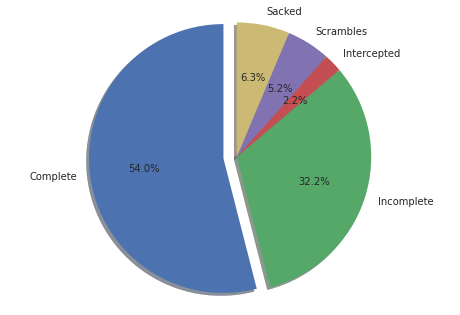

In [10]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
# Pie chart, where the slices will be ordered and plotted counter-clockwise: scrambled_playIds
labels = 'Complete', 'Incomplete', 'Intercepted', 'Scrambles', 'Sacked'
sizes = [len(completed_playIds), len(incomplete_playIds), len(intercepted_playIds), len(scrambled_playIds), len(sacks_playIds)]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [11]:
#tracing player paths by x,y 
#  https://www.kaggle.com/code/aaronzpearson/modelling-speed-curves-from-nfl-data

#nfl analytics
#  https://operations.nfl.com/gameday/analytics/stats-articles/

#calculating the convex hull for pass protectors
#  https://medium.com/@harshitsikchi/convex-hulls-explained-baab662c4e94
#  https://www.oreilly.com/library/view/python-cookbook/0596001673/ch17s19.html
#  https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html

#voronoi spaces for blockers and qb
#  https://en.wikipedia.org/wiki/Voronoi_diagram

#scipy spatial
#  https://docs.scipy.org/doc/scipy/reference/spatial.html

In [12]:
#list of all games
games_sql  = """SELECT games.gameId, games.week, games.gameDate
FROM games
"""
games_played = pd.read_sql_query(games_sql, con)
print(len(games_played))
print(games_played)




122
         gameId  week    gameDate
0    2021090900     1  09/09/2021
1    2021091200     1  09/12/2021
2    2021091201     1  09/12/2021
3    2021091202     1  09/12/2021
4    2021091203     1  09/12/2021
..          ...   ...         ...
117  2021103109     8  10/31/2021
118  2021103110     8  10/31/2021
119  2021103111     8  10/31/2021
120  2021103112     8  10/31/2021
121  2021110100     8  11/01/2021

[122 rows x 3 columns]


In [13]:
################# Individual Play Data #########################################
#play data by gameId and playId

def play_in_game(play_id, game_id):  
    sql = "SELECT * FROM plays WHERE (plays.playId='" + str(play_id) + "') AND (plays.gameId=" + str(game_id) + ")"
    query = pd.read_sql_query(sql, con)
    print(len(query))
    return query
'''
#Testing
playdata = play_in_game(97, 2021090900)

print("all plays from function")
print(type(playdata))
'''



'\n#Testing\nplaydata = play_in_game(97, 2021090900)\n\nprint("all plays from function")\nprint(type(playdata))\n'

In [14]:

#scouting data by gameId and playId

def scouting_in_game(play_id, game_id):  
    #sql = "SELECT * FROM plays WHERE (plays.playId='" + str(play_id) + "') AND (plays.gameId=" + str(game_id) + ")"
    sql = "SELECT * FROM pffScoutingData WHERE (pffScoutingData.playId='" + str(play_id) + "') AND (pffScoutingData.gameId=" + str(game_id) + ")"
    query = pd.read_sql_query(sql, con)
    #print(len(query))
    #print(passdata_allplay)
    return query
'''
#Testing

scoutingdata = scouting_in_game(97, 2021090900)

print("all scouting from function")
print(type(scoutingdata))
'''

'\n#Testing\n\nscoutingdata = scouting_in_game(97, 2021090900)\n\nprint("all scouting from function")\nprint(type(scoutingdata))\n'

In [15]:
#look up the week by gameId

def get_week_by_gameId(game_id): 
    
    sql = "SELECT week FROM games WHERE (games.gameId=" + str(game_id) + ")"
    query = pd.read_sql_query(sql, con)
    for index, row in query.iterrows():
        week = row["week"]
        
        

    return week
'''
#Testing

week_test = get_week_by_gameId(2021090900)
print(week_test)
'''

'\n#Testing\n\nweek_test = get_week_by_gameId(2021090900)\nprint(week_test)\n'

In [16]:

#tracking data for the play by gameId and playId

def tracking_for_play(week_id, play_id, game_id): 
    
    sql = "SELECT * FROM week" +  str(week_id) + " WHERE (week"+str(week_id)+".playId='" + str(play_id) + "') AND (week"+str(week_id)+".gameId=" + str(game_id) + ")"
    query = pd.read_sql_query(sql, con)
    #print(len(query))
    return query
'''
#Testing
trackingdata = tracking_for_play('week1', 97, 2021090900)

print("all tracking for play from function")
print(type(trackingdata))
'''

'\n#Testing\ntrackingdata = tracking_for_play(\'week1\', 97, 2021090900)\n\nprint("all tracking for play from function")\nprint(type(trackingdata))\n'

In [17]:

colors = {
    'ARI':"#97233F", 
    'ATL':"#A71930", 
    'BAL':'#241773', 
    'BUF':"#00338D", 
    'CAR':"#0085CA", 
    'CHI':"#C83803", 
    'CIN':"#FB4F14", 
    'CLE':"#311D00", 
    'DAL':'#003594',
    'DEN':"#FB4F14", 
    'DET':"#0076B6", 
    'GB':"#203731", 
    'HOU':"#03202F", 
    'IND':"#002C5F", 
    'JAX':"#9F792C", 
    'KC':"#E31837", 
    'LA':"#003594", 
    'LAC':"#0080C6", 
    'LV':"#000000",
    'MIA':"#008E97", 
    'MIN':"#4F2683", 
    'NE':"#002244", 
    'NO':"#D3BC8D", 
    'NYG':"#0B2265", 
    'NYJ':"#125740", 
    'PHI':"#004C54", 
    'PIT':"#FFB612", 
    'SEA':"#69BE28", 
    'SF':"#AA0000",
    'TB':'#D50A0A', 
    'TEN':"#4B92DB", 
    'WAS':"#5A1414", 
    'football':'#CBB67C'
}


#TODO:
# Add Useful Player Labels
# Add ability to keep or remove the extra stuff (line markers etc)
# Add Team Colors to dict
# Turn into Function 

def animate_play(tracking_df, play_df,players,pffScoutingData, gameId,playId):
    selected_play_df = play_df[(play_df.playId==playId)&(play_df.gameId==gameId)].copy()
    
    tracking_players_df = pd.merge(tracking_df,players,how="left",on = "nflId")
    tracking_players_df = pd.merge(tracking_players_df,pffScoutingData,how="left",on = ["nflId","playId","gameId"])
    selected_tracking_df = tracking_players_df[(tracking_players_df.playId==playId)&(tracking_players_df.gameId==gameId)].copy()

    sorted_frame_list = selected_tracking_df.frameId.unique()
    sorted_frame_list.sort()

    # get play General information 
    line_of_scrimmage = selected_play_df.absoluteYardlineNumber.values[0]
    first_down_marker = line_of_scrimmage + selected_play_df.yardsToGo.values[0]
    down = selected_play_df.down.values[0]
    quarter = selected_play_df.quarter.values[0]
    gameClock = selected_play_df.gameClock.values[0]
    playDescription = selected_play_df.playDescription.values[0]
    defendersInBox = selected_play_df.defendersInBox.values[0]
    
    # Handle case where we have a really long Play Description and want to split it into two lines
    if len(playDescription.split(" "))>15 and len(playDescription)>115:
        playDescription = " ".join(playDescription.split(" ")[0:16]) + "<br>" + " ".join(playDescription.split(" ")[16:])

    # initialize plotly start and stop buttons for animation
    updatemenus_dict = [
        {
            "buttons": [
                {
                    "args": [None, {"frame": {"duration": 100, "redraw": False},
                                "fromcurrent": True, "transition": {"duration": 0}}],
                    "label": "Play",
                    "method": "animate"
                },
                {
                    "args": [[None], {"frame": {"duration": 0, "redraw": False},
                                      "mode": "immediate",
                                      "transition": {"duration": 0}}],
                    "label": "Pause",
                    "method": "animate"
                }
            ],
            "direction": "left",
            "pad": {"r": 10, "t": 87},
            "showactive": False,
            "type": "buttons",
            "x": 0.1,
            "xanchor": "right",
            "y": 0,
            "yanchor": "top"
        }
    ]
    # initialize plotly slider to show frame position in animation
    sliders_dict = {
        "active": 0,
        "yanchor": "top",
        "xanchor": "left",
        "currentvalue": {
            "font": {"size": 20},
            "prefix": "Frame:",
            "visible": True,
            "xanchor": "right"
        },
        "transition": {"duration": 300, "easing": "cubic-in-out"},
        "pad": {"b": 10, "t": 50},
        "len": 0.9,
        "x": 0.1,
        "y": 0,
        "steps": []
    }


    frames = []
    for frameId in sorted_frame_list:
        data = []
        # Add Numbers to Field 
        data.append(
            go.Scatter(
                x=np.arange(20,110,10), 
                y=[5]*len(np.arange(20,110,10)),
                mode='text',
                text=list(map(str,list(np.arange(20, 61, 10)-10)+list(np.arange(40, 9, -10)))),
                textfont_size = 30,
                textfont_family = "Courier New, monospace",
                textfont_color = "#ffffff",
                showlegend=False,
                hoverinfo='none'
            )
        )
        data.append(
            go.Scatter(
                x=np.arange(20,110,10), 
                y=[53.5-5]*len(np.arange(20,110,10)),
                mode='text',
                text=list(map(str,list(np.arange(20, 61, 10)-10)+list(np.arange(40, 9, -10)))),
                textfont_size = 30,
                textfont_family = "Courier New, monospace",
                textfont_color = "#ffffff",
                showlegend=False,
                hoverinfo='none'
            )
        )
        # Add line of scrimage 
        data.append(
            go.Scatter(
                x=[line_of_scrimmage,line_of_scrimmage], 
                y=[0,53.5],
                line_dash='dash',
                line_color='blue',
                showlegend=False,
                hoverinfo='none'
            )
        )
        # Add First down line 
        data.append(
            go.Scatter(
                x=[first_down_marker,first_down_marker], 
                y=[0,53.5],
                line_dash='dash',
                line_color='yellow',
                showlegend=False,
                hoverinfo='none'
            )
        )
        # Plot Players
        for team in selected_tracking_df.team.unique():
            plot_df = selected_tracking_df[(selected_tracking_df.team==team)&(selected_tracking_df.frameId==frameId)].copy()
            if team != "football":
                hover_text_array=[]
                for nflId in plot_df.nflId:
                    selected_player_df = plot_df[plot_df.nflId==nflId]
                    hover_text_array.append("nflId:{}<br>displayName:{}<br>Position:{}<br>Role:{}".format(selected_player_df["nflId"].values[0],
                                                                                      selected_player_df["displayName"].values[0],
                                                                                      selected_player_df["pff_positionLinedUp"].values[0],
                                                                                      selected_player_df["pff_role"].values[0]))
                data.append(go.Scatter(x=plot_df["x"], y=plot_df["y"],mode = 'markers',marker_color=colors[team],name=team,hovertext=hover_text_array,hoverinfo="text"))
            else:
                data.append(go.Scatter(x=plot_df["x"], y=plot_df["y"],mode = 'markers',marker_color=colors[team],name=team,hoverinfo='none'))
        # add frame to slider
        slider_step = {"args": [
            [frameId],
            {"frame": {"duration": 100, "redraw": False},
             "mode": "immediate",
             "transition": {"duration": 0}}
        ],
            "label": str(frameId),
            "method": "animate"}
        sliders_dict["steps"].append(slider_step)
        frames.append(go.Frame(data=data, name=str(frameId)))

    scale=8
    layout = go.Layout(
        autosize=False,
        width=120*scale,
        height=60*scale,
        xaxis=dict(range=[0, 120], autorange=False, tickmode='array',tickvals=np.arange(10, 111, 5).tolist(),showticklabels=False),
        yaxis=dict(range=[0, 53.3], autorange=False,showgrid=False,showticklabels=False),

        plot_bgcolor='#00B140',
        # Create title and add play description at the bottom of the chart for better visual appeal
        title=f"GameId: {gameId}, PlayId: {playId}<br>{gameClock} {quarter}Q"+"<br>"*19+f"{playDescription}<br> Defenders in Box: {defendersInBox}",
        updatemenus=updatemenus_dict,
        sliders = [sliders_dict]
    )

    fig = go.Figure(
        data=frames[0]["data"],
        layout= layout,
        frames=frames[1:]
    )
    # Create First Down Markers 
    for y_val in [0,53]:
        fig.add_annotation(
                x=first_down_marker,
                y=y_val,
                text=str(down),
                showarrow=False,
                font=dict(
                    family="Courier New, monospace",
                    size=16,
                    color="black"
                    ),
                align="center",
                bordercolor="black",
                borderwidth=2,
                borderpad=4,
                bgcolor="#ff7f0e",
                opacity=1
                )

    return fig

#Testing
#animate_play(week1,plays,players,pffScoutingData,2021090900,97).show()

In [18]:
#all plays per game, sorted by team
def all_plays_per_game(game_id, team):  
    sql = "SELECT * FROM plays WHERE (plays.gameId=" + str(game_id) + ") \
    AND (plays.possessionTeam='" + team + "')"
    query = pd.read_sql_query(sql, con)
    return query

In [100]:
def OL_tracking(tracking_df, play_df,players,pffScoutingData, gameId,playId): 

    selected_play_df = play_df
    pffScoutingData.query("pff_role in ('Pass','Pass Block')", inplace=True)


    #filter tracking_df so it only contains tracking for players in pffScoutingData
    #creata a list of players by nflId 
    offense_trackers = []
    for index, row in pffScoutingData.iterrows():
        offense_trackers.append(row["nflId"])
    tracking_df.query("nflId == @offense_trackers", inplace=True) #df.query("Category == @filter_list")

    tracking_players_df = pd.merge(tracking_df,players,how="left",on = "nflId")
    
    tracking_players_df = pd.merge(tracking_players_df,pffScoutingData,how="left",on = ["nflId","playId","gameId"])
    
    tracking_players_df = pd.merge(tracking_players_df,selected_play_df,how="left",on = ["playId","gameId"])
    
    selected_tracking_df = tracking_players_df

    sorted_frame_list = selected_tracking_df.frameId.unique()
    sorted_frame_list.sort()
    
    # get play General information 
    line_of_scrimmage = selected_play_df.absoluteYardlineNumber.values[0]
    first_down_marker = line_of_scrimmage + selected_play_df.yardsToGo.values[0]
    down = selected_play_df.down.values[0]
    quarter = selected_play_df.quarter.values[0]
    gameClock = selected_play_df.gameClock.values[0]
    playDescription = selected_play_df.playDescription.values[0]
    defendersInBox = selected_play_df.defendersInBox.values[0]
    
    # Handle case where we have a really long Play Description and want to split it into two lines
    if len(playDescription.split(" "))>15 and len(playDescription)>115:
        playDescription = " ".join(playDescription.split(" ")[0:16]) + "<br>" + " ".join(playDescription.split(" ")[16:])

    # initialize plotly start and stop buttons for animation
    updatemenus_dict = [
        {
            "buttons": [
                {
                    "args": [None, {"frame": {"duration": 100, "redraw": False},
                                "fromcurrent": True, "transition": {"duration": 0}}],
                    "label": "Play",
                    "method": "animate"
                },
                {
                    "args": [[None], {"frame": {"duration": 0, "redraw": False},
                                      "mode": "immediate",
                                      "transition": {"duration": 0}}],
                    "label": "Pause",
                    "method": "animate"
                }
            ],
            "direction": "left",
            "pad": {"r": 10, "t": 87},
            "showactive": False,
            "type": "buttons",
            "x": 0.1,
            "xanchor": "right",
            "y": 0,
            "yanchor": "top"
        }
    ]
    # initialize plotly slider to show frame position in animation
    sliders_dict = {
        "active": 0,
        "yanchor": "top",
        "xanchor": "left",
        "currentvalue": {
            "font": {"size": 20},
            "prefix": "Frame:",
            "visible": True,
            "xanchor": "right"
        },
        "transition": {"duration": 300, "easing": "cubic-in-out"},
        "pad": {"b": 10, "t": 50},
        "len": 0.9,
        "x": 0.1,
        "y": 0,
        "steps": []
    }


    frames = []
    for frameId in sorted_frame_list:
        data = []
        # Add Numbers to Field 
        data.append(
            go.Scatter(
                x=np.arange(20,110,10), 
                y=[5]*len(np.arange(20,110,10)),
                mode='text',
                text=list(map(str,list(np.arange(20, 61, 10)-10)+list(np.arange(40, 9, -10)))),
                textfont_size = 30,
                textfont_family = "Courier New, monospace",
                textfont_color = "#ffffff",
                showlegend=False,
                hoverinfo='none'
            )
        )
        data.append(
            go.Scatter(
                x=np.arange(20,110,10), 
                y=[53.5-5]*len(np.arange(20,110,10)),
                mode='text',
                text=list(map(str,list(np.arange(20, 61, 10)-10)+list(np.arange(40, 9, -10)))),
                textfont_size = 30,
                textfont_family = "Courier New, monospace",
                textfont_color = "#ffffff",
                showlegend=False,
                hoverinfo='none'
            )
        )
       
        # Plot Players
        for team in selected_tracking_df.team.unique():
            plot_df = selected_tracking_df[(selected_tracking_df.team==team)&(selected_tracking_df.frameId==frameId)].copy()
            if team != "football":
                hover_text_array=[]
                for nflId in plot_df.nflId:
                    selected_player_df = plot_df[plot_df.nflId==nflId]
                    hover_text_array.append("nflId:{}<br>displayName:{}<br>Position:{}<br>Role:{}".format(selected_player_df["nflId"].values[0],
                                                                                      selected_player_df["displayName"].values[0],
                                                                                      selected_player_df["pff_positionLinedUp"].values[0],
                                                                                      selected_player_df["pff_role"].values[0]))
                data.append(go.Scatter(x=plot_df["x"], y=plot_df["y"],mode = 'markers',marker_color=colors[team],name=team,hovertext=hover_text_array,hoverinfo="text"))
            else:
                data.append(go.Scatter(x=plot_df["x"], y=plot_df["y"],mode = 'markers',marker_color=colors[team],name=team,hoverinfo='none'))
        # add frame to slider
        slider_step = {"args": [
            [frameId],
            {"frame": {"duration": 100, "redraw": False},
             "mode": "immediate",
             "transition": {"duration": 0}}
        ],
            "label": str(frameId),
            "method": "animate"}
        sliders_dict["steps"].append(slider_step)
        frames.append(go.Frame(data=data, name=str(frameId)))

    scale=8
    layout = go.Layout(
        autosize=False,
        width=120*scale,
        height=60*scale,
        xaxis=dict(range=[0, 120], autorange=False, tickmode='array',tickvals=np.arange(10, 111, 5).tolist(),showticklabels=False),
        yaxis=dict(range=[0, 53.3], autorange=False,showgrid=False,showticklabels=False),

        plot_bgcolor='#00B140',
        # Create title and add play description at the bottom of the chart for better visual appeal
        title=f"GameId: {gameId}, PlayId: {playId}<br>{gameClock} {quarter}Q"+"<br>"*19+f"{playDescription}<br> Defenders in Box: {defendersInBox}",
        updatemenus=updatemenus_dict,
        sliders = [sliders_dict]
    )

    fig = go.Figure(
        data=frames[0]["data"],
        layout= layout,
        frames=frames[1:]
    )
    
    return fig


    
all_game_plays_team = all_plays_per_game(2021090900, 'TB')
#print(all_game_plays_team)
scouting = scouting_in_game(97, 2021090900)
game_week = get_week_by_gameId(2021090900)
tracking = tracking_for_play(game_week, 97, 2021090900)    
OL_tracking(tracking,all_game_plays_team,players,scouting, 97, 2021090900).show()

In [98]:
################# Tracking Data for all plays in a Game for QB, OL ################################



all_game_plays_team = all_plays_per_game(2021090900, 'TB')

print("number of plays in game for team:")
print(len(all_game_plays_team))
print(type(all_game_plays_team))

all_game_plays_team = all_game_plays_team.reset_index()  # make sure indexes pair with number of rows
#iterate through the returned pandas dataframe and get dataframes for scouting and tracking
for index, row in all_game_plays_team.iterrows():
    # now get scouting and tracking fore each playId in a game
    scouting = scouting_in_game(row["playId"], row["gameId"])
    #look up the week id for the game id in games table
    game_week = get_week_by_gameId(row["gameId"])
    tracking = tracking_for_play(game_week, row["playId"], row["gameId"])
    #now plot the x,y,o,s of tracking for OL, QB
    plot_no = index + 1
    print(f"Plot no. {plot_no} of {len(all_game_plays_team)}")
    animate_play(tracking,all_game_plays_team,players,scouting,row["gameId"],row["playId"]).show()
    #get OL and QB x,y  this data will be presented as completed passes, incomplete passes,  interceptions, scrambles
    OL_tracking(tracking,all_game_plays_team,players,scouting, row["gameId"],row["playId"]).show()
    # two main groupings 1. success  2. unsuccesful pocket maintenance
    #compute bounding box for OL, QB for completed passes
    
    #compute half hull for OL, QB
    
    #compute mean distance from QB to OL points, which OL players are best at maintaining optimal distance
    #compute time to collapse on unsuccesful plays, time to pass on succesful plays
    
    




number of plays in game for team:
44
<class 'pandas.core.frame.DataFrame'>
Plot no. 1 of 44


Plot no. 2 of 44


Plot no. 3 of 44


Plot no. 4 of 44


Plot no. 5 of 44


Plot no. 6 of 44


Plot no. 7 of 44


Plot no. 8 of 44


Plot no. 9 of 44


Plot no. 10 of 44


Plot no. 11 of 44


Plot no. 12 of 44


Plot no. 13 of 44


Plot no. 14 of 44


Plot no. 15 of 44


Plot no. 16 of 44


Plot no. 17 of 44


Plot no. 18 of 44


Plot no. 19 of 44


Plot no. 20 of 44


Plot no. 21 of 44


Plot no. 22 of 44


Plot no. 23 of 44


Plot no. 24 of 44


Plot no. 25 of 44


Plot no. 26 of 44


Plot no. 27 of 44


Plot no. 28 of 44


Plot no. 29 of 44


Plot no. 30 of 44


Plot no. 31 of 44


Plot no. 32 of 44


Plot no. 33 of 44


Plot no. 34 of 44


Plot no. 35 of 44


Plot no. 36 of 44


Plot no. 37 of 44


Plot no. 38 of 44


Plot no. 39 of 44


Plot no. 40 of 44


Plot no. 41 of 44


Plot no. 42 of 44


Plot no. 43 of 44


Plot no. 44 of 44


In [ ]:
################# Tracking Data for all plays in a Game for Defensive Line ############################






In [ ]:
################# Tracking Data for all plays in all games for QB, OL ################################




In [ ]:
################# Tracking Data for all plays in a Game for Defensive Line ############################



# Complex Plotly Graph

For my more complex graph I set a few goals. 

**Goals:**
- Animate all frames in a play
- Color player dots with the actual team colors instead of generic home/away colors or having to set different colors each time I run the code
- Add Down, Distance and Situational information to the Animation
- Add Player information in hover/tooltip
- Add Play Description

### Get Colors for every team

I found a website online with color codes for each NFL team to help personalize the Animations a bit. 

Color Codes Found on the following sites: 

- https://teamcolorcodes.com/nfl-team-color-codes/

- https://www.schemecolor.com/american-football.php

Note: Not all color combo's are tested so you may get a weird combination. I could probably work out some color difference and switch to an alternate if they are too close but this is a first pass at it

### Play Animation Function